In [1]:
import shutil

def copy_directory(src_dir, dst_dir):
    try:
        shutil.copytree(src_dir, dst_dir)
        print(f"Direktori {src_dir} berhasil disalin ke {dst_dir}.")
    except shutil.Error as e:
        print(f"Kesalahan saat menyalin direktori: {e}")
    except OSError as e:
        print(f"Kesalahan sistem: {e}")

# Contoh penggunaan
src_directory = '/kaggle/input/cocoa-diseases-v3/cocoa_diseases/'
dst_directory = '/kaggle/working/cocoa_diseases'

copy_directory(src_directory, dst_directory)

Direktori /kaggle/input/cocoa-diseases-v3/cocoa_diseases/ berhasil disalin ke /kaggle/working/cocoa_diseases.


In [25]:
# Menghitung jumlah item dalam folder
folder_path = '/kaggle/working/cocoa_diseases/healthy'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 500


In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    """
    Splits the data into train and test sets
    
    Args:
      SOURCE_DIR (string): directory path containing the images
      TRAINING_DIR (string): directory path to be used for training
      VALIDATION_DIR (string): directory path to be used for validation
      SPLIT_SIZE (float): proportion of the dataset to be used for training
      
    Returns:
      None
    """
    if not os.path.exists(TRAINING_DIR):
          os.makedirs(TRAINING_DIR)
    if not os.path.exists(VALIDATION_DIR):
          os.makedirs(VALIDATION_DIR)


    if len(os.listdir(TRAINING_DIR)) > 0:
      for file in os.scandir(TRAINING_DIR):
        os.remove(file.path)

    if len(os.listdir(VALIDATION_DIR)) > 0:
      for file in os.scandir(VALIDATION_DIR):
        os.remove(file.path)
    ### START CODE HERE
    # pass
          # Loop through the source directory and get the list of all files
    file_list = os.listdir(SOURCE_DIR)
    
    # Shuffle the file list randomly
    random.shuffle(file_list)
    
    # Calculate the split index for training and validation sets
    split_index = int(SPLIT_SIZE * len(file_list))
    
    # Split the files into training and validation sets
    train_files = file_list[:split_index]
    val_files = file_list[split_index:]
    
    # Copy the training files to the training directory
    for file in train_files:
        src_path = os.path.join(SOURCE_DIR, file)
        dst_path = os.path.join(TRAINING_DIR, file)
        # Check if the file has non-zero length before copying
        if os.path.getsize(src_path) > 0:
            shutil.copyfile(src_path, dst_path)
        else:
            print(f"{file} is zero length, so ignoring.")
    
    # Copy the validation files to the validation directory
    for file in val_files:
        src_path = os.path.join(SOURCE_DIR, file)
        dst_path = os.path.join(VALIDATION_DIR, file)
        # Check if the file has non-zero length before copying
        if os.path.getsize(src_path) > 0:
            shutil.copyfile(src_path, dst_path)
        else:
            print(f"{file} is zero length, so ignoring.")

    ### END CODE HERE

In [4]:
# grader-required-cell

# Test your split_data function

# Define paths
black_pod_rot_SRC_DIR = "/kaggle/working/cocoa_diseases/black_pod_rot"
pod_borer_SRC_DIR = "/kaggle/working/cocoa_diseases/pod_borer"
healthy_SRC_DIR = "/kaggle/working/cocoa_diseases/healthy"


TRAINING_DIR = "/kaggle/working/training"
VALIDATION_DIR = "/kaggle/working/validation"


TRAINING_BPR_DIR = os.path.join(TRAINING_DIR, "black_pod_rot/")
VALIDATION_BPR_DIR = os.path.join(VALIDATION_DIR, "black_pod_rot/")

TRAINING_PB_DIR = os.path.join(TRAINING_DIR, "pod_borer/")
VALIDATION_PB_DIR = os.path.join(VALIDATION_DIR, "pod_borer/")

TRAINING_HEALTHY_DIR = os.path.join(TRAINING_DIR, "healthy/")
VALIDATION_HEALTHY_DIR = os.path.join(VALIDATION_DIR, "healthy/")

# create directory

if not os.path.exists(TRAINING_DIR):
  os.makedirs(TRAINING_DIR)
if not os.path.exists(VALIDATION_DIR):
  os.makedirs(VALIDATION_DIR)


# Empty directories in case you run this cell multiple times

# if len(os.listdir(TRAINING_BPR_DIR)) > 0:
#   for file in os.scandir(TRAINING_BPR_DIR):
#     os.remove(file.path)

# if len(os.listdir(VALIDATION_BPR_DIR)) > 0:
#   for file in os.scandir(VALIDATION_BPR_DIR):
#     os.remove(file.path)

# if len(os.listdir(TRAINING_PB_DIR)) > 0:
#   for file in os.scandir(TRAINING_PB_DIR):
#     os.remove(file.path)

# if len(os.listdir(VALIDATION_PB_DIR)) > 0:
#   for file in os.scandir(VALIDATION_PB_DIR):
#     os.remove(file.path)

# if len(os.listdir(TRAINING_HEALTHY_DIR)) > 0:
#   for file in os.scandir(TRAINING_HEALTHY_DIR):
#     os.remove(file.path)

# if len(os.listdir(VALIDATION_HEALTHY_DIR)) > 0:
#   for file in os.scandir(VALIDATION_HEALTHY_DIR):
#     os.remove(file.path)



# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(black_pod_rot_SRC_DIR, TRAINING_BPR_DIR, VALIDATION_BPR_DIR, split_size)
split_data(pod_borer_SRC_DIR, TRAINING_PB_DIR, VALIDATION_PB_DIR, split_size)
split_data(healthy_SRC_DIR, TRAINING_HEALTHY_DIR, VALIDATION_HEALTHY_DIR, split_size)

# Check that the number of images matches the expected output



In [5]:
# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal Black Pod Rot directory has {len(os.listdir(black_pod_rot_SRC_DIR))} images")
print(f"Original Pod Borer directory has {len(os.listdir(pod_borer_SRC_DIR))} images")
print(f"Original Healthy directory has {len(os.listdir(healthy_SRC_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_BPR_DIR))} images of Black Pod Rot for training")
print(f"There are {len(os.listdir(TRAINING_PB_DIR))} images of Pod Borer for training")
print(f"There are {len(os.listdir(TRAINING_HEALTHY_DIR))} images ofHealthy for training\n")

print(f"There are {len(os.listdir(VALIDATION_BPR_DIR))} images of Black Pod Rot for validation")
print(f"There are {len(os.listdir(VALIDATION_PB_DIR))} images of Pod Borer for validation")
print(f"There are {len(os.listdir(VALIDATION_HEALTHY_DIR))} images of Healthy for validation")



Original Black Pod Rot directory has 500 images
Original Pod Borer directory has 208 images
Original Healthy directory has 500 images

There are 400 images of Black Pod Rot for training
There are 166 images of Pod Borer for training
There are 400 images ofHealthy for training

There are 100 images of Black Pod Rot for validation
There are 42 images of Pod Borer for validation
There are 100 images of Healthy for validation


In [6]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(
                                    rescale=1. / 255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(500,500))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='categorical',
                                                                target_size=(500,500))
  ### END CODE HERE
  return train_generator, validation_generator

In [8]:

train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 966 images belonging to 3 classes.
Found 242 images belonging to 3 classes.


In [9]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(500,500,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    #tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')  
  ])

  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 64)       0

In [12]:
# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=30,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/30
49/49 [==============================] - 207s 4s/step - loss: 1.0205 - accuracy: 0.4099 - val_loss: 0.9676 - val_accuracy: 0.4876
Epoch 2/30
49/49 [==============================] - 206s 4s/step - loss: 0.9788 - accuracy: 0.5124 - val_loss: 0.9472 - val_accuracy: 0.5455
Epoch 3/30
49/49 [==============================] - 207s 4s/step - loss: 0.9760 - accuracy: 0.4959 - val_loss: 0.9985 - val_accuracy: 0.4917
Epoch 4/30
49/49 [==============================] - 208s 4s/step - loss: 0.9291 - accuracy: 0.5342 - val_loss: 0.9049 - val_accuracy: 0.5537
Epoch 5/30
49/49 [==============================] - 206s 4s/step - loss: 0.9118 - accuracy: 0.5870 - val_loss: 0.8360 - val_accuracy: 0.6157
Epoch 6/30
49/49 [==============================] - 206s 4s/step - loss: 0.8722 - accuracy: 0.6211 - val_loss: 0.8469 - val_accuracy: 0.5950
Epoch 7/30
49/49 [==============================] - 207s 4s/step - loss: 0.8383 - accuracy: 0.6180 - val_loss: 0.8734 - val_accuracy: 0.6074
Epoch 8/30
49

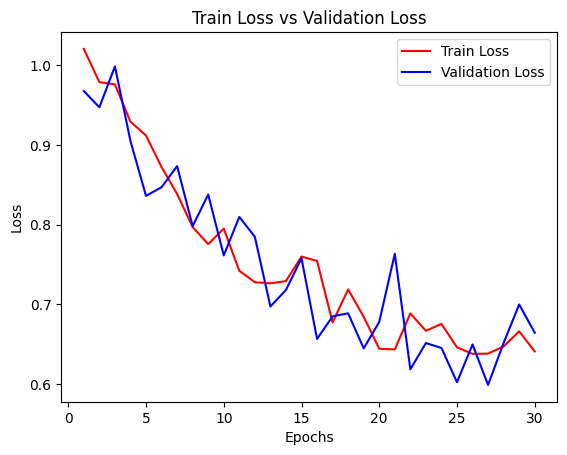

In [13]:
# Melihat train loss dan validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot train loss dan validation loss
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

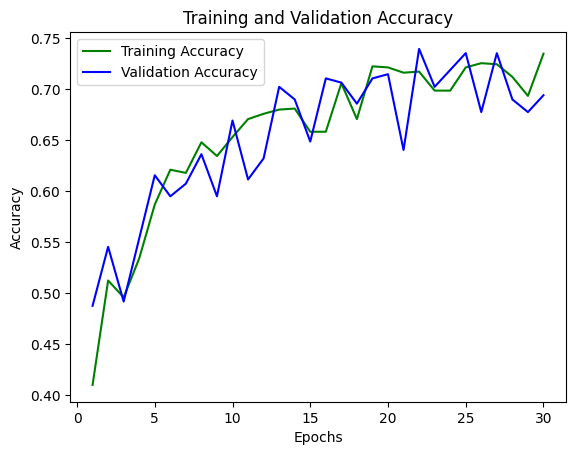

In [14]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()